**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# import data 2C_weka.csv for 2 Class Classifcation.

In [2]:
df2C=pd.read_csv("2Classdata.csv")
df2C.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [6]:
df2C.isnull().head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False


In [13]:
df2C['class'].unique()

array(['Abnormal', 'Normal'], dtype=object)

In [3]:
df2C.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

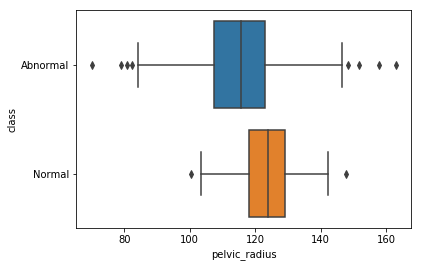

In [21]:
sns.boxplot(x='pelvic_radius', y='class', data=df2C)

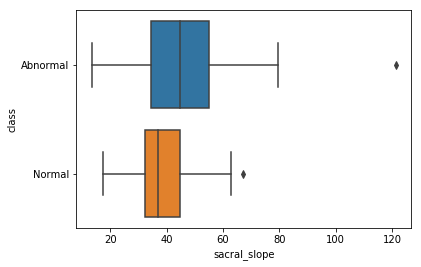

In [20]:
sns.boxplot(x='sacral_slope', y='class', data=df2C)

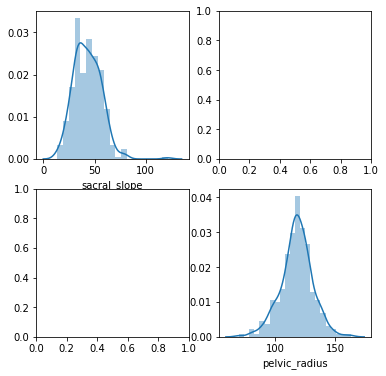

In [17]:
fig, axs = plt.subplots(figsize=(6,6), ncols=2, nrows=2)
sns.distplot(df2C['pelvic_radius'], ax=axs[1,1]);
sns.distplot(df2C['sacral_slope'], ax=axs[0,0]);

In [5]:
df2C.corr()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
pelvic_tilt numeric,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


# Encode the Class variable to integer.

In [5]:
number=LabelEncoder()
df2C['class']=number.fit_transform(df2C['class'].astype('str'))
df2C.sample(10)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
124,74.717228,14.321679,32.500000,60.395549,107.182218,37.017080,0
15,44.318907,12.537992,36.098763,31.780915,124.115836,5.415825,0
202,76.314028,41.933683,93.284863,34.380345,132.267285,101.218783,0
95,57.522356,33.647075,50.909858,23.875281,140.981712,148.753711,0
201,67.513053,33.275590,96.283062,34.237463,145.601033,88.301486,0
210,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,1
192,74.469082,33.283157,66.942101,41.185925,146.466001,124.984406,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,1
177,80.817771,19.238981,61.642451,61.578791,89.471834,44.167602,0
83,81.104100,24.794168,77.887020,56.309932,151.839857,65.214616,0


In [24]:
df2C['class'].dtypes

dtype('int32')

# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [6]:
X=df2C.drop(columns='class')
X.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


In [8]:
y=df2C['class']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int32

# Split the data as train and test with a ratio of 70:30.

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 5)

In [79]:
X_train.shape

(217, 6)

In [80]:
X_test.shape

(93, 6)

In [81]:
y_train.shape

(217,)

In [82]:
y_test.shape

(93,)

# Normalize your Data (X) to get values between 0 to 1.

In [109]:
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Build the KNN model using Train Dataset and predict the class on test dataset.

In [110]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
train_pred=knn.predict(X_train)
test_pred=knn.predict(X_test)
Class_test=pd.DataFrame(test_pred, columns=["class"])
Class_test.head()

,class
0,0
1,1
2,1
3,1
4,0


# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [42]:
from sklearn.metrics import accuracy_score

In [85]:
print('Training accuracy=',accuracy_score(y_train,train_pred))

Training accuracy= 0.8617511520737328


In [86]:
print('Testing accuracy=',accuracy_score(y_test,test_pred))

Testing accuracy= 0.8279569892473119


# What is the best K value for your classifcation?
#Find at which k value you get the best score.

In [87]:
optimal_K = 1
model_error = 0
index = 0
df_index = []
df_values = []
dataframe_plot = pd.Series()
for number_of_neighbor in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=number_of_neighbor)
    knn_model.fit(X_train, y_train)
    test_error = 1 - accuracy_score(y_test, knn_model.predict(X_test))
    df_index.append(number_of_neighbor)
    df_values.append(test_error)
    if(index == 0):
        model_error = test_error
        index = 1
    if(model_error > test_error):
        model_error = test_error
        optimal_K = number_of_neighbor
    
print("The optimal number of neighbour is ", optimal_K)

The optimal number of neighbour is  4


In [88]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)
train_pred=knn.predict(X_train)
test_pred=knn.predict(X_test)
Class_test=pd.DataFrame(test_pred, columns=["class"])
Class_test.head()

,class
0,1
1,1
2,1
3,0
4,1


In [89]:
print("Best perfomance score is", (accuracy_score(y_test, test_pred)*100))

Best perfomance score is 83.87096774193549


# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

In [6]:
df3C=pd.read_csv("3Classdata.csv")
df3C.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [7]:
df3C.isnull().head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False


In [92]:
df3C['class'].unique()

array(['Hernia', 'Spondylolisthesis', 'Normal'], dtype=object)

In [93]:
df3C.dtypes

pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

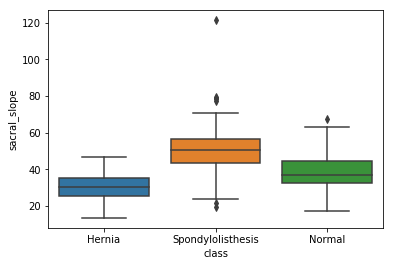

In [94]:
sns.boxplot(x='class', y='sacral_slope', data=df3C)

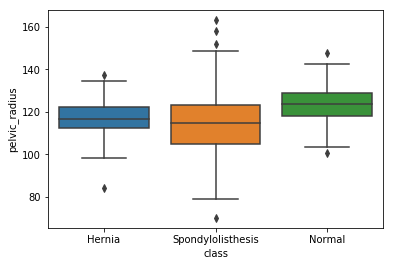

In [95]:
sns.boxplot(x='class', y='pelvic_radius', data=df3C)

In [7]:
df3C.corr()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
pelvic_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


In [8]:
number=LabelEncoder()
df3C['class']=number.fit_transform(df3C['class'].astype('str'))
df3C.sample(10)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
264,54.503685,6.819910,47.000000,47.683775,111.791172,-4.406769,1
40,35.492446,11.701672,15.590363,23.790774,106.938852,-3.460358,0
105,65.007964,27.602608,50.947519,37.405357,116.581109,7.015978,2
163,115.923261,37.515436,76.800000,78.407825,104.698603,81.198927,2
175,56.563824,8.961262,52.577846,47.602562,98.777115,50.701873,2
87,44.914149,10.218996,44.630914,34.695154,130.075660,37.364540,2
155,66.804796,14.551602,72.084912,52.253195,82.456038,41.685474,2
55,47.657730,13.277385,36.679985,34.380345,98.249781,6.273012,0
171,78.401254,14.042260,79.694263,64.358994,104.731234,12.392853,2
172,56.668293,13.458203,43.769710,43.210089,93.692209,21.108121,2


In [97]:
X=df3C.drop(columns='class')
X.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


In [98]:
y=df3C['class']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int32

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 3)

In [100]:
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
train_pred=knn.predict(X_train)
test_pred=knn.predict(X_test)
Class_test=pd.DataFrame(test_pred, columns=["class"])
Class_test.head()

,class
0,0
1,1
2,1
3,1
4,0


In [101]:
from sklearn.metrics import accuracy_score
print('Training accuracy=',accuracy_score(y_train,train_pred))
print('Testing accuracy=',accuracy_score(y_test,test_pred))

Training accuracy= 0.8525345622119815
Testing accuracy= 0.8279569892473119


In [102]:
optimal_K = 1
model_error = 0
index = 0
df_index = []
df_values = []
dataframe_plot = pd.Series()
for number_of_neighbor in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=number_of_neighbor)
    knn_model.fit(X_train, y_train)
    test_error = 1 - accuracy_score(y_test, knn_model.predict(X_test))
    df_index.append(number_of_neighbor)
    df_values.append(test_error)
    if(index == 0):
        model_error = test_error
        index = 1
    if(model_error > test_error):
        model_error = test_error
        optimal_K = number_of_neighbor
    
print("The optimal number of neighbour is ", optimal_K)

The optimal number of neighbour is  4


In [76]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)
train_pred=knn.predict(X_train)
test_pred=knn.predict(X_test)
Class_test=pd.DataFrame(test_pred, columns=["class"])
Class_test.head()

,class
0,0
1,1
2,1
3,1
4,0


In [103]:
print("Best perfomance score is", (accuracy_score(y_test, test_pred)*100))

Best perfomance score is 82.79569892473118
